In [1]:
import pandas as pd
import requests

Berikut beberapa API gratis yang bisa kita pakai untuk belajar :
- [Joke API](https://github.com/15Dkatz/official_joke_api)
    - random joke : `https://official-joke-api.appspot.com/jokes/random`
    - 10 random joke : `https://official-joke-api.appspot.com/jokes/ten`
- [Name2Gender API](https://genderize.io)
    - input nama : `https://api.genderize.io?name=peter`
    - input negara : `https://api.genderize.io?name=peter&country_id=US`
- [public Holiday PI](https://date.nager.at/Api)
-[xkcd comic API](https://xkcd.com/json.html)
    - comic terbaru : `https://xkcd.com/info.0.json`
    - comic ke 614 : `https://xkcd.com/614/info.0.json`

# Get Request With Python

In [2]:
r = requests.get(url="https://official-joke-api.appspot.com/jokes/random")

In [3]:
r.status_code

200

In [4]:
r.text

'{"type":"general","setup":"Why did Sweden start painting barcodes on the sides of their battleships?","punchline":"So they could Scandinavian.","id":318}'

In [5]:
r.json()

{'type': 'general',
 'setup': 'Why did Sweden start painting barcodes on the sides of their battleships?',
 'punchline': 'So they could Scandinavian.',
 'id': 318}

# Exercise 1 : Public Holiday API

Coba extract hari libur di Indonesia pada tahun 2021

In [14]:
h = requests.get(url="https://date.nager.at/api/v3/publicholidays/2021/ID")
h.status_code

200

In [15]:
pd.DataFrame(h.json())

,date,localName,name,countryCode,fixed,global,counties,launchYear,types
0,2021-01-01,Tahun Baru Masehi,New Year's Day,ID,False,True,None,None,[Public]
1,2021-04-02,Wafat Isa Almasih,Good Friday,ID,False,True,None,None,[Public]
2,2021-04-04,Paskah,Easter Sunday,ID,False,True,None,None,[Public]
3,2021-05-01,Hari Buruh Internasional,Labour Day,ID,False,True,None,None,[Public]
4,2021-05-13,Kenaikan Isa Almasih,Ascension Day,ID,False,True,None,None,[Public]
5,2021-06-01,Hari Lahir Pancasila,Pancasila Day,ID,False,True,None,None,[Public]
6,2021-08-17,Hari Ulang Tahun Kemerdekaan Republik Indonesia,Independence Day,ID,False,True,None,None,[Public]
7,2021-12-25,Hari Raya Natal,Christmas Day,ID,False,True,None,None,[Public]


In [38]:
# Menggunakan Parameter
parameter = {
    "year":2021,
    "countryCode":"ID"
}

h = requests.get(url=f"https://date.nager.at/api/v3/PublicHolidays/{parameter['year']}/{parameter['countryCode']}") # Tidak bisa menggunakan parameter params di fungsi get 
                                                                                                                    # dikarenakan URL yang saya gunakan tidak berbentuk 
                                                                                                                    # query parameters melainkan bagian dari path
h.status_code

200

In [37]:
h.json()

[{'date': '2021-01-01',
  'localName': 'Tahun Baru Masehi',
  'name': "New Year's Day",
  'countryCode': 'ID',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2021-04-02',
  'localName': 'Wafat Isa Almasih',
  'name': 'Good Friday',
  'countryCode': 'ID',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2021-04-04',
  'localName': 'Paskah',
  'name': 'Easter Sunday',
  'countryCode': 'ID',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2021-05-01',
  'localName': 'Hari Buruh Internasional',
  'name': 'Labour Day',
  'countryCode': 'ID',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2021-05-13',
  'localName': 'Kenaikan Isa Almasih',
  'name': 'Ascension Day',
  'countryCode': 'ID',
  'fixed': False,
  'global': True,
  'counties

# Task 1 : Generate Random User dengan menggunakan random user API

In [66]:
# Generate Random User
r = requests.get("https://randomuser.me/api/")
result = r.json()

# Task 2 : Parsing Output API

In [67]:
# Mengambil informasi hasil dari generate random user
info = result['results'][0]

In [68]:
# Membuat dictonary sebuah biodata dari random user
biodata = {
    'born': info["dob"]["date"],
    'gender': info["gender"],
    'first_name': info["name"]["first"],
    'last_name': info["name"]["last"],
}
biodata

{'born': '1995-08-29T14:28:53.442Z',
 'gender': 'male',
 'first_name': 'Jimi',
 'last_name': 'Koskinen'}

In [69]:
# Ubah format Tanggal
from dateutil import parser
date = parser.parse(biodata["born"])
date = date.strftime("%d-%m-%Y")

# Timpa biodata["born"] menjadi date yang sudah dirubah formatnya
biodata["born"] = date
biodata

{'born': '29-08-1995',
 'gender': 'male',
 'first_name': 'Jimi',
 'last_name': 'Koskinen'}

# Post Request

In [70]:
from luwiji.flask_api import illustration

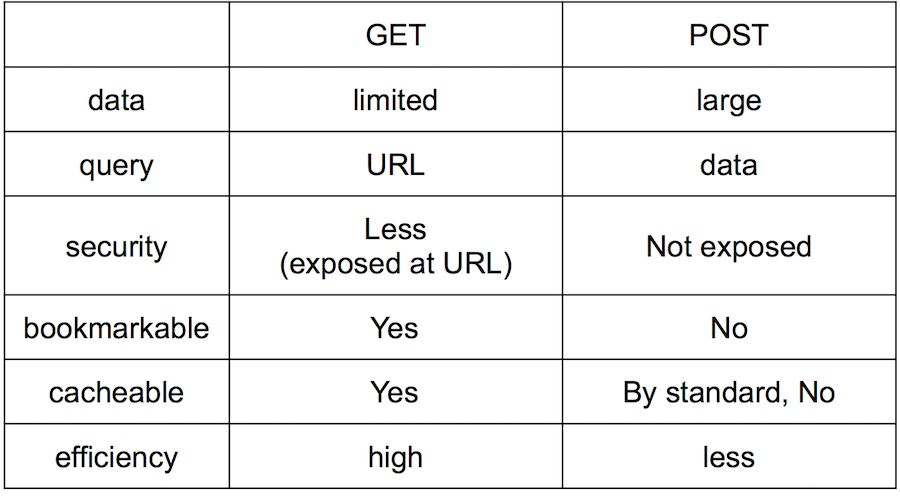

In [71]:
illustration.get_vs_post